Q1. Information about the Apple company is given in the below variable b,

b = {'city': 'Cupertino', 'phone': '408 996 1010', 'state': 'CA', 'country': 'United States', 'website': 'https://www.apple.com'Links to an external site., 'recommendationKey': 'buy', 'gross profits': 152836000000, 'freeCashflow': 73295003648, 'targetMedianPrice': 170, 'currentPrice': 174.56, 'earningsGrowth': 0.662, 'currentRatio': 1.075}

Write the Python codes (not more than 5 lines) to

Declare the variable 'b'. (0.5 points)
Use the dictionary indexing to print the location  (the country) of the Apple company, and its gross profits. Your printing statement should give comprehensive information. (2 points)
Use the Pandas library to transform the dictionary 'b' into a DataFrame. (0.5 points)
Change all column names to lowercase, Replace Spaces with Underscores, and Remove White Spaces.  (2 points)

In [70]:
import pandas as pd

# Declare the variable 'b'
b = {'city': 'Cupertino', 'phone': '408 996 1010', 'state': 'CA', 'country': 'United States', 'website': 'https://www.apple.com', 'recommendationKey': 'buy', 'gross profits': 152836000000, 'freeCashflow': 73295003648, 'targetMedianPrice': 170, 'currentPrice': 174.56, 'earningsGrowth': 0.662, 'currentRatio': 1.075}

# Print location and gross profits
print(f"Apple is located in {b['country']} and its gross profits are {b['gross profits']}")

# Convert dictionary to DataFrame
df = pd.DataFrame([b])

# Change column names to lowercase, replace spaces with underscores, and remove white spaces
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()

print(df)


Apple is located in United States and its gross profits are 152836000000
        city         phone state        country                website  \
0  Cupertino  408 996 1010    CA  United States  https://www.apple.com   

  recommendationkey  gross_profits  freecashflow  targetmedianprice  \
0               buy   152836000000   73295003648                170   

   currentprice  earningsgrowth  currentratio  
0        174.56           0.662         1.075  


Q2. Read 'rentals Download rentals.csv', and

+ Perform data-cleaning as you see fit (3 points)

 + Write one-line Python code to print the average price of houses for each property type and (2 points)

+ Write Python codes (not more than 5 lines) to draw a boxplot graph to visualize the price distribution based on the property type. (5 points)

+ Label the box plot and explain your observation regarding the price distribution based on the property type. Your explanation should be written in Python as a markdown or comment. (3 points)

In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("rentals (1).csv")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


In [58]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [59]:
# Calculate average price of houses for each property type
avg_prices = df[df['property_type'] == 'House'].groupby('property_type')['price'].mean()
print(avg_prices)


property_type
House    224.442524
Name: price, dtype: float64


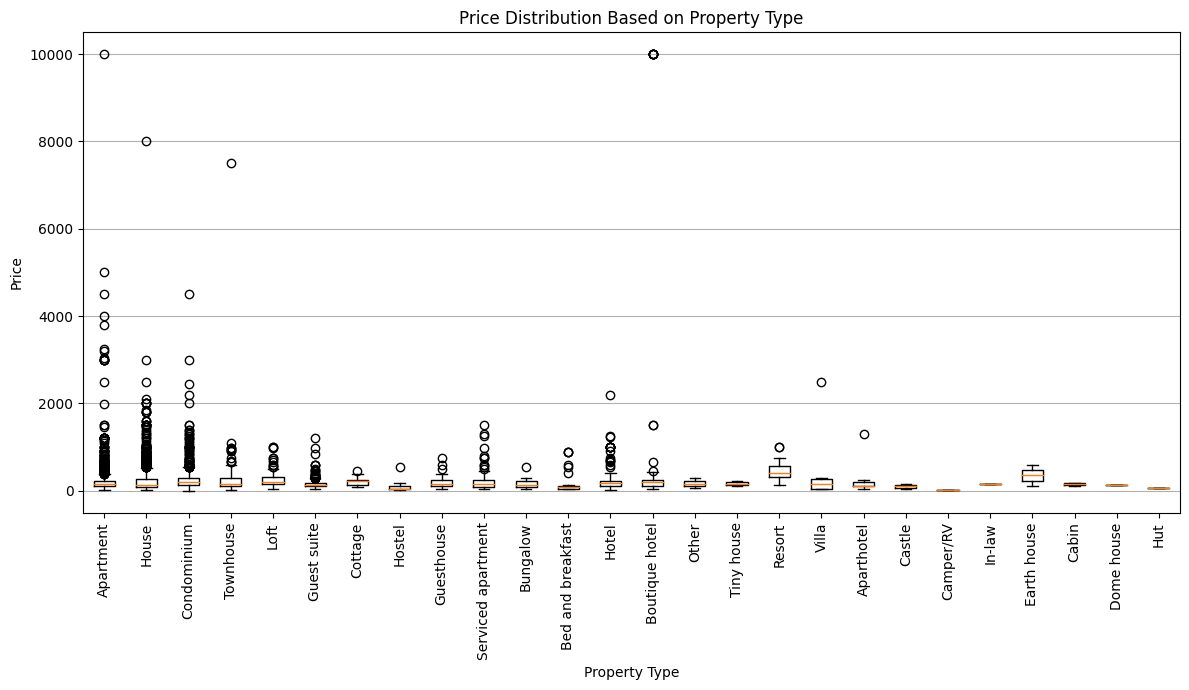

In [60]:
import matplotlib.pyplot as plt

# Draw boxplot
plt.figure(figsize=(12, 7))
plt.boxplot([df[df['property_type'] == prop]['price'] for prop in df['property_type'].unique()])
plt.xticks(range(1, len(df['property_type'].unique()) + 1), df['property_type'].unique(), rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution Based on Property Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [61]:
"""
Observations:
The boxplot visually represents the distribution of prices for different property types.
- Apartments, Houses, and Condominiums have a varied price range, with Apartments having the widest spread.
- Lofts, Guest suite and Guesthouse generally show a moderate price range compared to other types.
- The outliers are more noticeable in Houses, Apartments, Condominiums, Townhouse and Boutique hotel suggesting a wider price range for these property types.
"""


'\nObservations:\nThe boxplot visually represents the distribution of prices for different property types.\n- Apartments, Houses, and Condominiums have a varied price range, with Apartments having the widest spread.\n- Lofts, Guest suite and Guesthouse generally show a moderate price range compared to other types.\n- The outliers are more noticeable in Houses, Apartments, Condominiums, Townhouse and Boutique hotel suggesting a wider price range for these property types.\n'

Q3. Refer to your Final Project

+ Write two-line Python code to print the statistical properties of the dataset used for the final project. (2 points)

+ Write one-line Python code to find the columns with the categorical data types in your dataset.  (2 points)

+ Write Python code (not more than 5 lines) to replace the missing values of the columns with the median values. (3 points)

In [62]:
dataset = pd.read_csv("Course Evaluation_Parami.csv")

In [63]:
# Statistical properties of the dataset
print(dataset.describe(include='all'))

                          Timestamp        Age  Attendance % Gender  \
count                            11  11.000000     11.000000     11   
unique                           10        NaN           NaN      2   
top     2022/12/08 8:39:37 PM GMT+7        NaN           NaN   Male   
freq                              2        NaN           NaN      7   
mean                            NaN  20.636364     97.000000    NaN   
std                             NaN   5.258759      4.266146    NaN   
min                             NaN  16.000000     88.000000    NaN   
25%                             NaN  18.500000     96.000000    NaN   
50%                             NaN  20.000000     99.000000    NaN   
75%                             NaN  20.000000    100.000000    NaN   
max                             NaN  36.000000    100.000000    NaN   

       Students Self Evaluation [I have been challenged to learn more than I expected.]  \
count                                                  1

In [64]:
# Columns with categorical data types
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Timestamp', 'Gender', 'Students Self Evaluation [I have been challenged to learn more than I expected.]', 'Students Self Evaluation [I have put a great deal of effort in this course.]', 'Students Self Evaluation [I consistently prepared for class.]', 'Students Self Evaluation [I always perform well in the class. ]', 'Students Self Evaluation [Compared to my peers, I am above average student. ]', 'Skill and responsiveness of the instructor(s) [Teachings were clear and organized]', 'Skill and responsiveness of the instructor(s) [Instructor(s) stimulated student interest]', 'Skill and responsiveness of the instructor(s) [Instructor(s) effectively used time during class periods]', 'Skill and responsiveness of the instructor(s) [Instructor(s) was available and helpful]', 'Skill and responsiveness of the instructor(s) [The instructor(s) cared about the students, their progress, and successful course completion.]', 'Course Structure [This class has increased my interest in data science fiel

In [66]:
# Replacing missing values with median values
for col in dataset.columns:
    if dataset[col].dtype != 'object':  # Check if column is not categorical
        median = dataset[col].median()
        dataset[col].fillna(median, inplace=True)